Kaggle: https://www.kaggle.com/carrie1/ecommerce-data

E-commence:
Dataset: 541909 samples, 8 features。

**content:** 
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."


**Content**

1. Load Libraries and Dataset

2. Data Insight

        2.1 Data types
        2.2 Missing value
        2.3 Outliers
        
3. Exploratory Data Analysis (EDA)

        3.1 Categorical features
            3.1.1 InvoiceDate
            3.1.2 CustomerID
            3.1.3 InvoiceNo
            3.1.4 StockCode
            3.1.5 Description
            3.1.6 County
        
        3.2 Numerical features
            3.2.1 A New feature: Price = Quantity * UnitPrice
        
4. Modeling and Visualization

        4.1 Sales
            4.1.1 Monthly sales amount 
            4.1.2 Quarterly sales amount 
            4.1.3 Hourly sales amount
            4.1.4 Summary
        
        4.2 Merchandise
            4.2.1 Top sales items
            4.2.2 Items -- price preference
            4.2.3 Items -- association rules
            4.2.4 Summary

        4.3 Customers
            4.3.1 Percentage of different countries
            4.3.2 Customer segmentation -- RFM
            4.3.3 Personas -- Clustering
            4.3.4 Summary

## 1. Load Libraries and Dataset

In [1]:
# Data analysis
import numpy as np
import pandas as pd
import datetime as dt
import math

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.cm as cm

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Feature engineering, modeling
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
data_df = pd.read_csv("data.csv")
data_df.shape

(541909, 8)

In [3]:
data_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


## 2. Data Insight

In this section, it would go through basic Information of the dataset, e.g. data type,  missing data etc.

    2.1 Data types
    2.2 Missing value
    2.3 Outliers

### 2.1 Data types

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2.2 Missing value

In [5]:
data_df.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
## Remove missing value

custId_na_idx = data_df.loc[data_df.CustomerID.isnull()].index
len(custId_na_idx)

135080

In [7]:
data_df.drop(index=custId_na_idx, inplace=True)
data_df.reset_index(drop=True, inplace=True)

data_df.shape

(406829, 8)

In [8]:
data_df.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### 2.3 Outliers

In [9]:
data_df.describe(np.linspace(0, 1, 9)).T

,count,mean,std,min,0%,12.5%,25%,37.5%,50%,62.5%,75%,87.5%,100%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,-80995.0,1.00,2.00,3.00,5.00,8.00,12.00,24.00,80995.0,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,0.0,0.65,1.25,1.45,1.95,2.55,3.75,5.95,38970.0,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,12346.0,13078.00,13953.00,14562.00,15152.00,15987.00,16791.00,17590.00,18287.0,18287.0


In [10]:
# return: Q1 - 1.5*IQR and Q3 + 1.5*IQR
def calc_outlier_value(df, col, coef):
    q3 = np.percentile(df[col], 75)
    q1 = np.percentile(df[col], 25)
    iqr = q3 - q1
    
    return round(q1-(coef*iqr), 4), round(q3+(coef*iqr), 4)

In [11]:
calc_outlier_value(data_df, "UnitPrice", 1.5)

(-2.5, 7.5)

In [12]:
calc_outlier_value(data_df, "Quantity", 3)

(-28.0, 42.0)

In [13]:
# Logically, quantity and unitPrice should be greater than 0.
data_df = data_df.loc[(data_df.Quantity > 0) | (data_df.UnitPrice > 0.05)]
data_df.shape

(406825, 8)

In [14]:
data_df.reset_index(drop=True, inplace=True)

## 3. EDA

In this section, it will mainly focus on exploratory data analysis on all features.

    3.1 Categorical features
                3.1.1 InvoiceDate
                3.1.2 CustomerID
                3.1.3 InvoiceNo
                3.1.4 StockCode
                3.1.5 Description
                3.1.6 County
        
    3.2 Numerical features
        3.2.1 A New feature: Price = Quantity * UnitPrice

### 3.1 Categorical features

In [15]:
data_df.loc[:, data_df.dtypes == object].head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


#### 3.1.1 InvoiceDate

In order to further analysis on different dimensions on time (month, quarter, date, etc.), extracting atomic elements from the feature named InvoiceDate.

Create new features: Year-Month, Quarter, DayOfWeek, Hour

In [16]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])

## Add Features: Year-Month
data_df["Year-Month"] = data_df.InvoiceDate.dt.strftime("%Y-%m") 

## Add Features: Quarter
data_df["Quarter"] = data_df["Year-Month"].apply(lambda x: x.split("-")[0] 
                                                + "-Q" + str(math.ceil(int(x.split("-")[1])/3)))

## Add Features: dayofweek
data_df["DayOfWeek"] = data_df.InvoiceDate.dt.dayofweek

## Add Features: Hour
data_df["Hour"] = data_df.InvoiceDate.dt.hour

In [17]:
data_df.InvoiceDate.dt.year.unique()

array([2010, 2011])

In [18]:
data_df.InvoiceDate.dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
np.sort(data_df.InvoiceDate.dt.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [20]:
np.sort(data_df.InvoiceDate.dt.dayofweek.unique())

array([0, 1, 2, 3, 4, 6])

In [21]:
np.sort(data_df.InvoiceDate.dt.hour.unique())

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

#### 3.1.2 CustomerID

In [22]:
data_df.CustomerID.unique().size

4372

In [23]:
data_df.CustomerID.value_counts().head()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: CustomerID, dtype: int64

#### 3.1.3 InvoiceNo

In [24]:
data_df.InvoiceNo.unique().size

22186

In [25]:
data_df.InvoiceNo.value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### 3.1.4 StockCode

In [26]:
data_df.StockCode.unique().size

3684

In [27]:
# Do not consider the quantity so far.
data_df.StockCode.value_counts().head()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
Name: StockCode, dtype: int64

#### 3.1.5 Description

In [28]:
data_df.Description.unique().size

3896

In [29]:
data_df.Description.value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

In [30]:
temp = data_df[["StockCode", "Description"]].copy()
temp.shape

(406825, 2)

In [31]:
temp.drop_duplicates().shape

(3916, 2)

#### 3.1.6 Country

In [32]:
data_df.Country.unique().size

37

In [33]:
data_df.Country.value_counts().head()

United Kingdom    361874
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [34]:
(data_df.Country.value_counts()/np.sum(data_df.Country.value_counts())).head()

United Kingdom    0.889508
Germany           0.023339
France            0.020871
EIRE              0.018399
Spain             0.006226
Name: Country, dtype: float64

### 3.2 Numerical features

In [35]:
data_df["Price"] = data_df["Quantity"]*data_df["UnitPrice"]
data_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Quarter,DayOfWeek,Hour,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-Q4,2,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-Q4,2,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-Q4,2,8,22.00


In [36]:
data_df["Price"].describe()

count    406825.000000
mean         20.402789
std         427.593553
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Price, dtype: float64

In [37]:
rev_neg_idx = data_df.loc[data_df.Price <= 0].index
len(rev_neg_idx)

8941

In [38]:
data_df.drop(index=rev_neg_idx, inplace=True)
data_df.reset_index(drop=True, inplace=True)
data_df.shape

(397884, 13)

## 4. Modeling and Visualization

In this section, it will mainly focus on the data analysis from following three dimensions:

    4.1 Sales
        4.1.1 Monthly sales amount 
        4.1.2 Quarterly sales amount 
        4.1.3 Hourly sales amount
        4.1.4 Summary
        
    4.2 Merchandise
        4.2.1 Top sales items
        4.2.2 Items -- price preference
        4.2.3 Items -- association rules
        4.2.4 Summary
    
    4.3 Customers
        4.3.1 Percentage of different countries
        4.3.2 Customer segmentation -- RFM
        4.3.3 Personas -- Clustering
        4.3.4 Summary

### 4.1 Sales

Subset: "InvoiceNo", "Price", "StockCode", "Quantity", "Description", "Country", "Year-Month", "Quarter", "DayOfWeek", "Hour"

In [39]:
sales_cols = ["InvoiceNo", "Price", "StockCode", "Quantity", "Description", "Country", "Year-Month", "Quarter", "DayOfWeek", "Hour"]

sales_df = data_df[sales_cols]
sales_df.head(3)

,InvoiceNo,Price,StockCode,Quantity,Description,Country,Year-Month,Quarter,DayOfWeek,Hour
0,536365,15.30,85123A,6,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12,2010-Q4,2,8
1,536365,20.34,71053,6,WHITE METAL LANTERN,United Kingdom,2010-12,2010-Q4,2,8
2,536365,22.00,84406B,8,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12,2010-Q4,2,8


In [40]:
# Generate a dataframe for further analysis.
def generate_df(group_col):
    base_df = sales_df[[group_col, "Price", "InvoiceNo", "Quantity"]].groupby(group_col)
    
    # Price
    rev_df = base_df["Price"].sum().reset_index()

    rev_df["Description"] = 'Price'
    rev_df = rev_df.rename(columns={"Price": "Number"})
    
    # Quantity
    qty_df = base_df["Quantity"].sum().reset_index()

    qty_df["Description"] = 'Quantity'
    qty_df = qty_df.rename(columns={"Quantity": "Number"})
    
    # invoice number
    inv_df = base_df["InvoiceNo"].count().reset_index()

    inv_df["Description"] = 'OrdersNumber'
    inv_df = inv_df.rename(columns={"InvoiceNo": "Number"})

    return pd.concat([rev_df, qty_df, inv_df]).sort_values(by=group_col)

In [41]:
def plot_orders_amount(base_df, x_value, title):
    sns.set_style("white")
    plt.figure(figsize=(14, 8))
    
    data1 = base_df.loc[base_df.Description=="OrdersNumber"]
    data2 = base_df.loc[base_df.Description=="Price"]
    
    x = base_df[x_value].loc[base_df.Description=="OrdersNumber"]
    y1 = data1.Number
    y2 = data2.Number
    
    ax1 = sns.barplot(x=x, y=y1, data=data1, alpha=0.8)

    for p in ax1.patches:
        # get the height of each bar
        height = p.get_height()

        ## adding text to each bar

        # x-coordinate position of data label, padded to be in the middle of the bar
        ax1.text(x = p.get_x()+(p.get_width()/2), 
                # y-coordinate position of data label, padded 100 above bar
                y = height+100, 
                # data label, formatted to ignore decimals
                s = '{:.0f}'.format(height), 
                # sets horizontal alignment (ha) to center
                ha = 'center') 

    plt.xticks(rotation=60)
    plt.xlabel(x_value, fontsize=14)
    plt.ylabel("Number of Orders", fontsize=14)

    ax2 = ax1.twinx() ## add a lineplot
    
    ax2 = sns.lineplot(x=x, y=y2, data=data2, alpha=0.8)
    
    for x, y in zip(x, y2):
        plt.text(x, y-150, '{:.0f}'.format(y), ha='center', va= 'bottom', color='white', fontsize=10).set_backgroundcolor('#965786')


    plt.ylabel("Total Price", fontsize=14)

    plt.title("The Consumption Trends -- %s (01/12/2010 ~ 09/12/2011)" %(title), fontsize=18)
    plt.show()

In [42]:
def plot_sales_amount(base_df, x_axis, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 8))

    ax = sns.barplot(x=x_axis, y="Number", hue="Description", \
                     data=base_df.loc[base_df.Description.isin(["Price", "Quantity"])], alpha=0.8)

    ax.axhline(y=base_df.loc[base_df.Description == 'Price'].Number.median() , color='blue' , linestyle='--')
    ax.axhline(y=base_df.loc[base_df.Description == 'Quantity'].Number.median() , color='orange' , linestyle='--')

    plt.xlabel(x_axis, fontsize=14)
    plt.ylabel("Number", fontsize=14)
    plt.title("Comparison: Sales Amount & Sales Volume -- %s (01/12/2010 ~ 09/12/2011)" % (title), fontsize=18)
    plt.show()

#### 4.1.1 Monthly Analysis

In [43]:
monthly_df = generate_df("Year-Month")
monthly_df.head()

,Year-Month,Number,Description
0,2010-12,572713.89,Price
0,2010-12,312265.00,Quantity
0,2010-12,26157.00,OrdersNumber
1,2011-01,569445.04,Price
1,2011-01,349098.00,Quantity


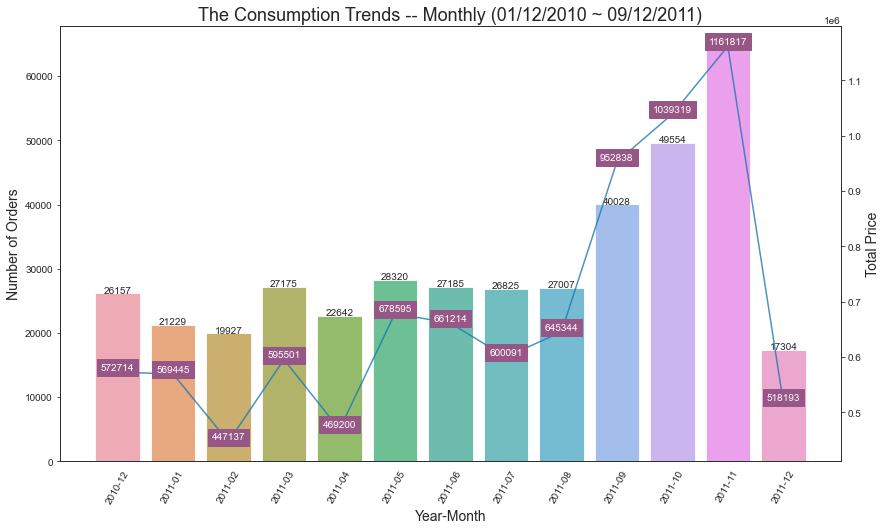

In [44]:
plot_orders_amount(monthly_df, "Year-Month", "Monthly")

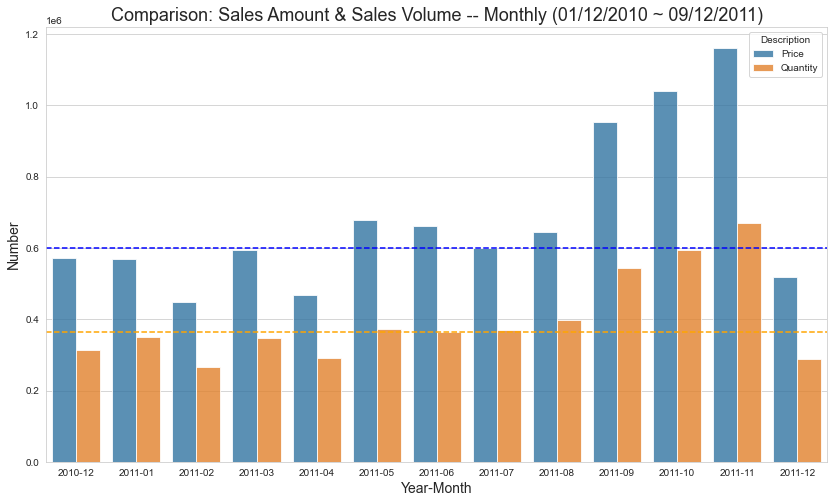

In [45]:
plot_sales_amount(monthly_df, "Year-Month", "Monthly")

#### 4.1.2 Quarterly Analysis

In [46]:
quarterly_df = generate_df("Quarter")
quarterly_df.head()

,Quarter,Number,Description
0,2010-Q4,572713.89,Price
0,2010-Q4,312265.00,Quantity
0,2010-Q4,26157.00,OrdersNumber
1,2011-Q1,1612083.15,Price
1,2011-Q1,963223.00,Quantity


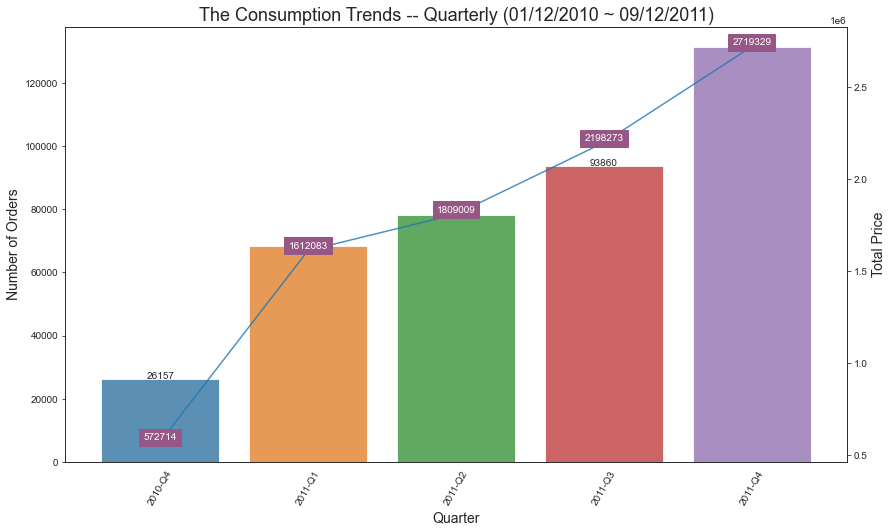

In [47]:
plot_orders_amount(quarterly_df, "Quarter", "Quarterly")

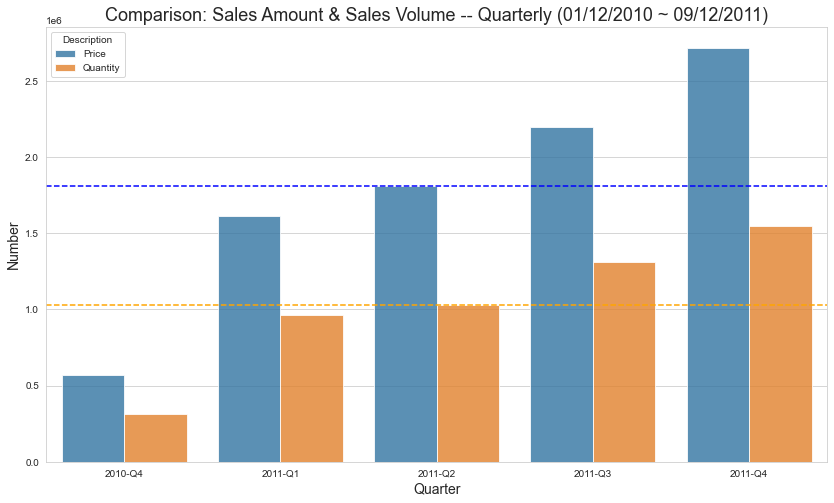

In [48]:
plot_sales_amount(quarterly_df, "Quarter",  "Quarterly")

#### 4.1.3 Hourly Analysis

In [49]:
hourly_df = generate_df("Hour").sort_values(by="Hour")
hourly_df.Hour = hourly_df.Hour.astype(str)
hourly_df.dtypes

Hour            object
Number         float64
Description     object
dtype: object

In [50]:
hourly_df.loc[hourly_df.Description=="OrdersNumber"].head()

,Hour,Number,Description
0,6,1.0,OrdersNumber
1,7,379.0,OrdersNumber
2,8,8690.0,OrdersNumber
3,9,21944.0,OrdersNumber
4,10,37997.0,OrdersNumber


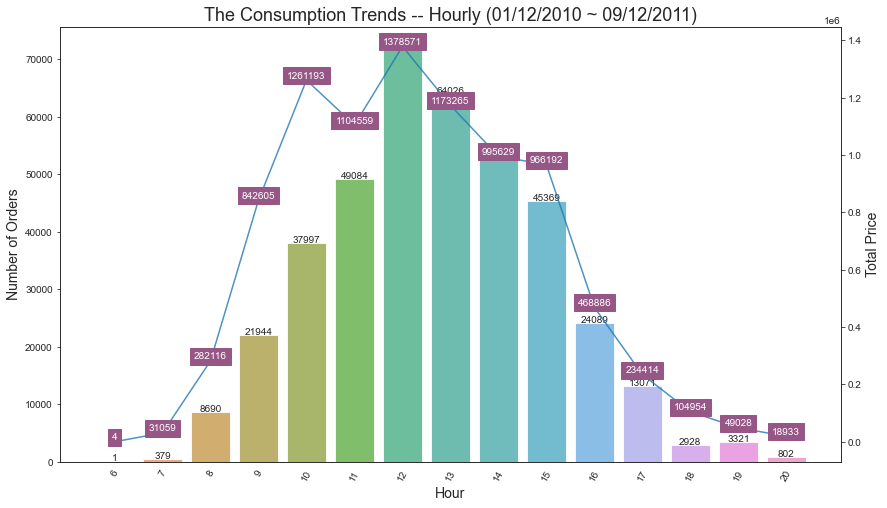

In [51]:
plot_orders_amount(hourly_df, "Hour", "Hourly")

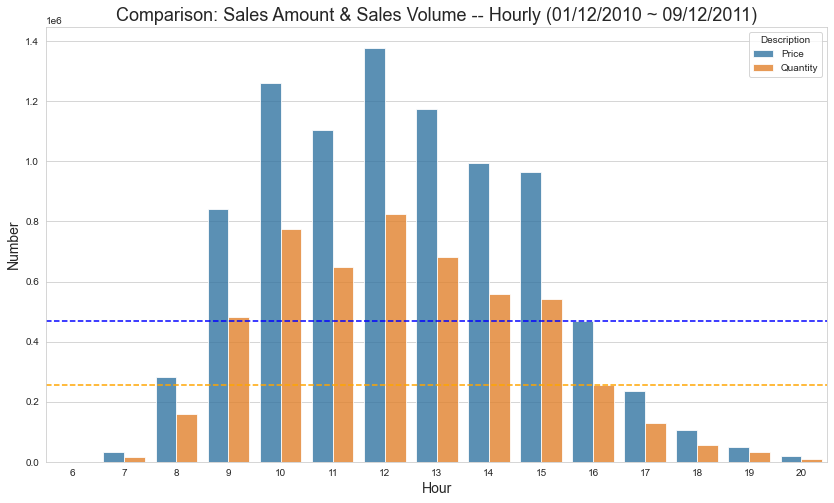

In [52]:
plot_sales_amount(hourly_df, "Hour", "Hourly")

#### 4.1.4 Summary

From above modules analysis, we can gain some knowledge about sales as below:

(Do not cover dayofweek analysis because of missing all Fridays' data, having checked in 3.1.1)

***Monthly Sales***
* The number of orders in December, 2011 is obviously lower than that of December in 2010 is because the data in "2011-12" is only covered 9 days based on official description.

* The consumption is mainly centered in September, October and November, and sales peaked in November, the results may caused by holidays: Halloween (October), Thanks Giving Day (November), Christmas Day (Dember - may store beforehanc) according to the context -- "The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

***Quarterly Sales***
* The sales amount in Q4, 2010 is the lowest is because it only includes the statistics of December. Thus, we can only check the volumn in 2011. The overall trend is upward, we may do a further prediction by quarter on sales.

***Hourly Sales***
* The sales amount is mainly centered from 12 o'clock to 14 o'clock, however, the utilization is very low in other hours, especially at night and in the early morning. Hence, we may think about if we can take some actions, for example, applying cloud to save resources or other website maintenance work.


**Conclusion**
* Aims to different characteristics of holidays, raising more targeted promotion schemes.

* In terms of procurement, logistics and website operation, taking some action to impove the efficiency and save resources.

### 4.2 Merchandise

In [53]:
### StockCode

stock_cols = ["StockCode", "UnitPrice", "Quantity", "Description", "Price", "InvoiceNo", "InvoiceDate", "Country"]

stock_df = data_df[stock_cols]
stock_df.head(3)

,StockCode,UnitPrice,Quantity,Description,Price,InvoiceNo,InvoiceDate,Country
0,85123A,2.55,6,WHITE HANGING HEART T-LIGHT HOLDER,15.30,536365,2010-12-01 08:26:00,United Kingdom
1,71053,3.39,6,WHITE METAL LANTERN,20.34,536365,2010-12-01 08:26:00,United Kingdom
2,84406B,2.75,8,CREAM CUPID HEARTS COAT HANGER,22.00,536365,2010-12-01 08:26:00,United Kingdom


#### 4.2.1 Top sales items

In [54]:
stock_grouped_df = stock_df.groupby(["StockCode", "UnitPrice", "Description"])

In [55]:
stock_price_qty = stock_grouped_df['Quantity'].sum().reset_index().sort_values(by="Quantity", ascending=False)
stock_price_qty.head()

,StockCode,UnitPrice,Description,Quantity
6368,23843,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995
5262,23166,1.04,MEDIUM CERAMIC TOP STORAGE JAR,76087
7229,84077,0.29,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27528
7228,84077,0.21,WORLD WAR 2 GLIDERS ASSTD DESIGNS,23904
2579,22197,0.72,POPCORN HOLDER,22940


In [56]:
total_qty = np.sum(stock_price_qty.Quantity)
total_qty

5167812

In [57]:
stock_price_qty["QtyPercent"] = stock_price_qty["Quantity"].div(np.sum(stock_price_qty["Quantity"]))
stock_price_qty.head()

,StockCode,UnitPrice,Description,Quantity,QtyPercent
6368,23843,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995,0.015673
5262,23166,1.04,MEDIUM CERAMIC TOP STORAGE JAR,76087,0.014723
7229,84077,0.29,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27528,0.005327
7228,84077,0.21,WORLD WAR 2 GLIDERS ASSTD DESIGNS,23904,0.004626
2579,22197,0.72,POPCORN HOLDER,22940,0.004439


In [58]:
stock_price_qty[["UnitPrice", "Quantity"]].describe(np.linspace(0, 1, 9)).T

,count,mean,std,min,0%,12.5%,25%,37.5%,50%,62.5%,75%,87.5%,100%,max
UnitPrice,8881.0,10.878821,136.173384,0.001,0.001,0.55,1.06,1.45,2.04,2.95,4.15,7.08,8142.75,8142.75
Quantity,8881.0,581.895282,1769.890884,1.000,1.000,6.00,18.00,48.00,111.00,242.00,520.00,1230.00,80995.00,80995.00


In [59]:
# series = stock_price_qty.UnitPrice
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 1e7]
labels = ["0~1", "1~2", "2~3", "3~4", "4~5", "5~6", "6~7", "7~8", "others"]
stock_price_qty["PriceBin"] = pd.cut(stock_price_qty.UnitPrice \
                                     , bins = bins \
                                     , right = False \
                                     , labels = labels)

stock_price_qty.head(3)

,StockCode,UnitPrice,Description,Quantity,QtyPercent,PriceBin
6368,23843,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995,0.015673,2~3
5262,23166,1.04,MEDIUM CERAMIC TOP STORAGE JAR,76087,0.014723,1~2
7229,84077,0.29,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27528,0.005327,0~1


In [143]:
"""
This method is used to label the number on the bar, and the median level of the y-axix variable.
"""
def plot_bartext_with_hline(ax, df, hline):
    for p in ax.patches:
    # get the height of each bar
        height = p.get_height()

        ## adding text to each bar

        # x-coordinate position of data label, padded to be in the middle of the bar
        ax.text(x = p.get_x()+(p.get_width()/2)
                # y-coordinate position of data label, padded 100 above bar
                ,y = height + 100
                # data label, formatted to ignore decimals
                ,s = '{:.0f}'.format(height)
                # sets horizontal alignment (ha) to center
                ,ha = 'center', fontsize=12)
    
    ax.axhline(y = df[hline].median(), color='blue', linestyle='--')

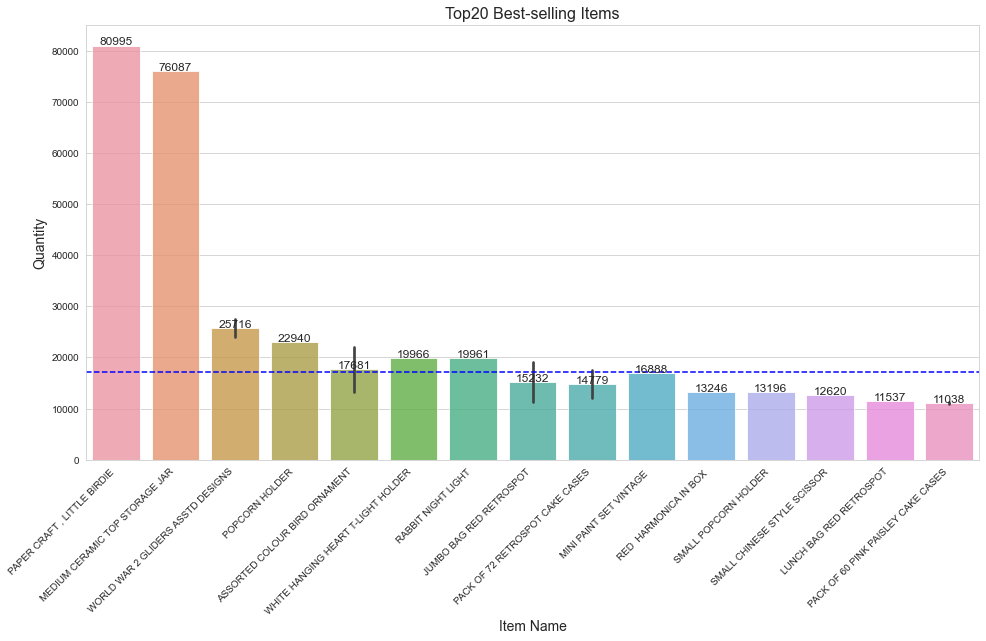

In [144]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8))

top20_df = stock_price_qty.head(20)

ax = sns.barplot(x="Description", y="Quantity", data=top20_df, alpha=0.8)
plt.xticks(rotation=45, ha='right')

plot_bartext_with_hline(ax, top20_df, "Quantity")

plt.xlabel("Item Name", fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.title("Top20 Best-selling Items", fontsize=16)

plt.show()

#### 4.2.2 Items - price preference

In [61]:
## Price preference

stock_price_qty.head(3)

,StockCode,UnitPrice,Description,Quantity,QtyPercent,PriceBin
6368,23843,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995,0.015673,2~3
5262,23166,1.04,MEDIUM CERAMIC TOP STORAGE JAR,76087,0.014723,1~2
7229,84077,0.29,WORLD WAR 2 GLIDERS ASSTD DESIGNS,27528,0.005327,0~1


In [62]:
unitprice_grouped_df = stock_price_qty.groupby("PriceBin")

In [63]:
unitprice_grouped_df["Quantity"].sum()\
    .reset_index().sort_values(by="PriceBin")

,PriceBin,Quantity
0,0~1,2040676
1,1~2,1770369
2,2~3,747870
3,3~4,207119
4,4~5,204765
5,5~6,48331
6,6~7,33570
7,7~8,31423
8,others,83689


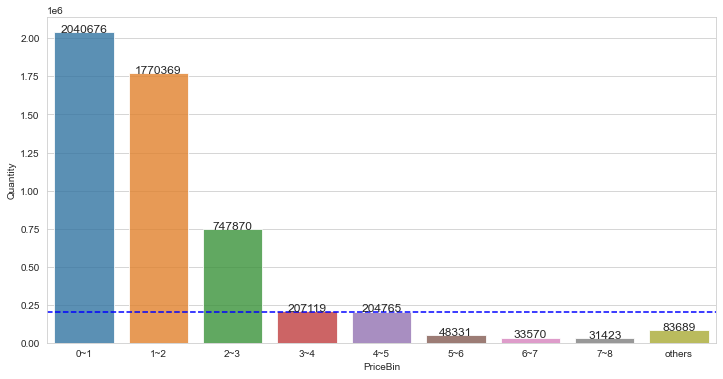

In [145]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 6))
df = unitprice_grouped_df["Quantity"].sum()\
    .reset_index().sort_values(by="PriceBin")

ax = sns.barplot(x="PriceBin", y="Quantity", data=df, alpha=0.8)

plot_bartext_with_hline(ax, df, "Quantity")

plt.show()

#### 4.2.3 Items - association rules

In [65]:
items_df = data_df[["Description", "InvoiceNo", "Country", "Quantity"]]
items_df['Description'] = items_df.Description.apply(lambda x: str(x).strip())
items_df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(397884, 4)

In [66]:
items_df.dropna(axis=0, subset=["InvoiceNo"], inplace=True)

items_df.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(397884, 4)

In [67]:
items_df = items_df.loc[~items_df.InvoiceNo.str.contains('C')]
items_df.shape

(397884, 4)

In [68]:
basket_france = items_df.loc[items_df.Country == "France"].pivot_table(columns="Description", index="InvoiceNo", values="Quantity", aggfunc=np.sum).fillna(0)

basket_france.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
basket_germany = items_df.loc[items_df.Country == "Germany"].groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
basket_germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
def encode_item(x):
    if x <= 0:
        return 0
    
    if x >= 1:
        return 1

In [71]:
basket_france_sets = basket_france.applymap(encode_item)
basket_france_sets.drop("POSTAGE", inplace=True, axis=1)

In [72]:
type(basket_france_sets)

pandas.core.frame.DataFrame

In [73]:
## modeling

frq_items_france = apriori(basket_france_sets, min_support=0.05, use_colnames=True)

frq_items_france


,support,itemsets
0,0.071979,(4 TRADITIONAL SPINNING TOPS)
1,0.097686,(ALARM CLOCK BAKELIKE GREEN)
2,0.102828,(ALARM CLOCK BAKELIKE PINK)
3,0.095116,(ALARM CLOCK BAKELIKE RED)
4,0.069409,(ASSORTED COLOUR MINI CASES)
...,...,...
107,0.102828,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED..."
108,0.123393,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY..."
109,0.064267,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK..."
110,0.069409,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN..."


In [74]:
# collecting the inferred rules in a dataframe
rules_france = association_rules(frq_items_france, metric="lift", min_threshold=1)
rules_france = rules_france.sort_values(["confidence", "lift"], ascending=[False, False])
rules_france.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612
81,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301
67,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
9,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.069409,0.071979,0.064267,0.925926,12.863757,0.059271,12.528278
39,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056555,0.064267,0.051414,0.909091,14.145455,0.047779,10.293059


In [146]:
rules_france[(rules_france["lift"] >= 6) & (rules_france["confidence"] >= 0.8)].sort_values("lift", ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056555,0.064267,0.051414,0.909091,14.145455,0.047779,10.293059
38,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.064267,0.056555,0.051414,0.800000,14.145455,0.047779,4.717224
9,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.069409,0.071979,0.064267,0.925926,12.863757,0.059271,12.528278
8,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071979,0.069409,0.064267,0.892857,12.863757,0.059271,8.685518
70,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.074550,0.095116,0.064267,0.862069,9.063374,0.057176,6.560411


#### 4.2.4 Summary

From above modules analysis, we can gain some knowledge about mechandise as below:

(Do not cover dayofweek analysis because of missing all Fridays' data, having checked in 3.1.1)

***Top Sales Items***
* The listed top 20 popular items can help us to make plans on purchasing.


***Items - Price Preference***
* From the figure, we can know that, customers prefer buying cheaper goods from the company, that is also can be explained, the majority of the company is wholesale.

***Items - Association Rules***
* The association rules can help the company make promotion strategies on sales.


**Conclusion**
* Procurement and storage management: More clear about the sales information about items.

* Set up recommendation rule based on association rules.

### 4.3 Customers

In [76]:
user_cols = ["CustomerID", "InvoiceNo", "InvoiceDate", "Price", "StockCode", "Quantity", "Description", "Country"]

user_df = data_df[user_cols]
user_df.head(3)

,CustomerID,InvoiceNo,InvoiceDate,Price,StockCode,Quantity,Description,Country
0,17850.0,536365,2010-12-01 08:26:00,15.30,85123A,6,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,17850.0,536365,2010-12-01 08:26:00,20.34,71053,6,WHITE METAL LANTERN,United Kingdom
2,17850.0,536365,2010-12-01 08:26:00,22.00,84406B,8,CREAM CUPID HEARTS COAT HANGER,United Kingdom


In [77]:
user_grouped_df = user_df.groupby(["CustomerID"])

user_pay = user_grouped_df["Price"].sum().reset_index()
user_freq = user_grouped_df["InvoiceNo"].count().reset_index()

pay_freq = pd.merge(user_pay, user_freq, on="CustomerID")
pay_freq = pay_freq.rename(columns={"InvoiceNo":"OrdersNumber"})
pay_freq.head(3)

,CustomerID,Price,OrdersNumber
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31


In [78]:
calc_outlier_value(pay_freq, "Price", 1.5)

(-1724.0725, 3693.2275)

In [79]:
calc_outlier_value(pay_freq, "Price", 3)

(-3755.56, 5724.715)

In [80]:
calc_outlier_value(pay_freq, "OrdersNumber", 1.5)

(-107.5, 224.5)

In [81]:
calc_outlier_value(pay_freq, "OrdersNumber", 3)

(-232.0, 349.0)

In [82]:
pay_freq.loc[(pay_freq.Price <= 4000) & (pay_freq.OrdersNumber <= 300)]

,CustomerID,Price,OrdersNumber
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
5,12352.0,2506.04,85
6,12353.0,89.00,4
...,...,...,...
4332,18278.0,173.90,9
4333,18280.0,180.60,10
4334,18281.0,80.82,7
4335,18282.0,178.05,12


In [83]:
pay_freq_cleaned = pay_freq.loc[(pay_freq.Price <= 4000) & (pay_freq.OrdersNumber <= 300)]

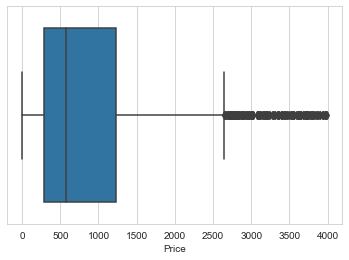

In [84]:
sns.set_style("whitegrid")
# fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(x="Price", data=pay_freq_cleaned)
plt.show()

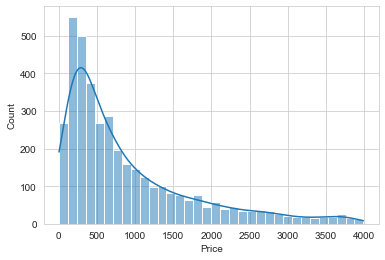

In [85]:
sns.set_style("whitegrid")
# fig = plt.figure(figsize=(12, 8))

ax = sns.histplot(x="Price", data=pay_freq_cleaned, kde="True")
plt.show()

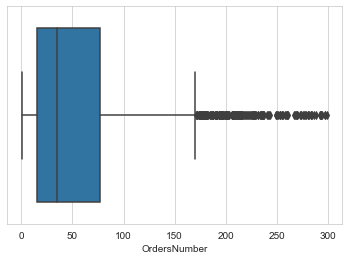

In [86]:
sns.set_style("whitegrid")
# fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(x="OrdersNumber", data=pay_freq_cleaned)
plt.show()

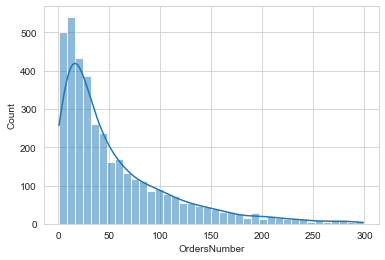

In [87]:
sns.set_style("whitegrid")
# fig = plt.figure(figsize=(12, 8))

ax = sns.histplot(x="OrdersNumber", data=pay_freq_cleaned, kde="True")
plt.show()

In [88]:
pay_freq = pay_freq.sort_values(by="Price", ascending=False)
pay_freq.reset_index(drop=True, inplace=True)

In [89]:
pay_freq.head()

,CustomerID,Price,OrdersNumber
0,14646.0,280206.02,2076
1,18102.0,259657.30,431
2,17450.0,194550.79,337
3,16446.0,168472.50,3
4,14911.0,143825.06,5675


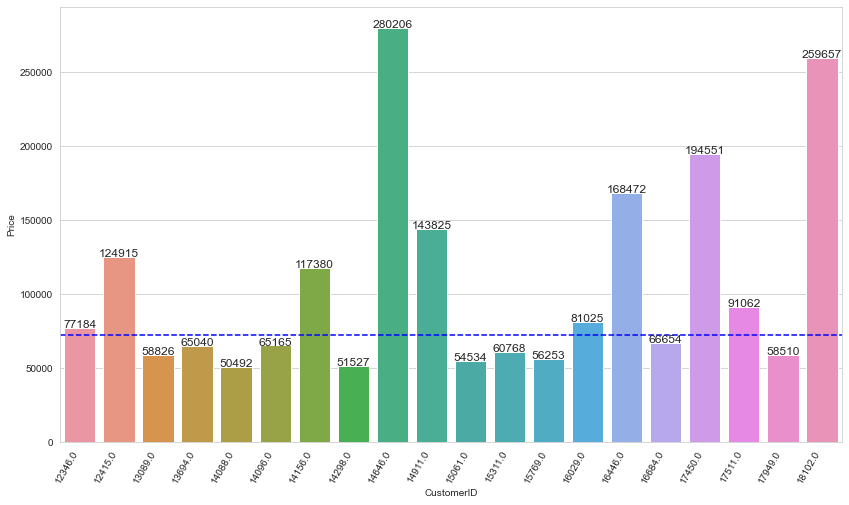

In [147]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14, 8))
df = pay_freq.sort_values(by="Price", ascending=False).head(20)

ax = sns.barplot(x="CustomerID", y="Price", data=df)

plot_bartext_with_hline(ax, df, "Price")

plt.xticks(rotation=60, ha="right")
plt.show()

#### 4.3.1 Percentage of different countries

In [91]:
## Customer & Country

country_grouped_df = user_df.groupby("Country")

In [92]:
cty_rev = country_grouped_df["Price"].sum().reset_index()

In [93]:
cty_cus = country_grouped_df["CustomerID"].count().reset_index()
cty_cus = cty_cus.rename(columns={"CustomerID": "CustomersNumber"})

In [94]:
country_cost_df = pd.merge(cty_rev, cty_cus, on="Country")\
        .sort_values(by="Price", ascending=False)

country_cost_df["PerCustomerTransaction"] = country_cost_df["Price"].div(country_cost_df["CustomersNumber"])

country_cost_df.reset_index(drop=True, inplace=True)
country_cost_df.head(11)

,Country,Price,CustomersNumber,PerCustomerTransaction
0,United Kingdom,7.308392e+06,354321,20.626470
1,Netherlands,2.854463e+05,2359,121.003111
2,EIRE,2.655459e+05,7236,36.697886
3,Germany,2.288671e+05,9040,25.317162
4,France,2.090240e+05,8341,25.059831
5,Australia,1.385213e+05,1182,117.192310
6,Spain,6.157711e+04,2484,24.789497
7,Switzerland,5.644395e+04,1841,30.659397
8,Belgium,4.119634e+04,2031,20.283772
9,Sweden,3.837833e+04,451,85.096075


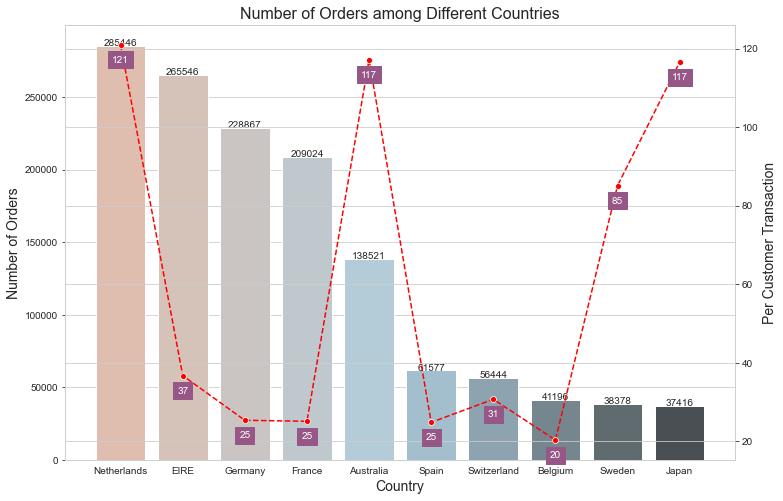

In [160]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 8))

df = country_cost_df.loc[country_cost_df.Country != "United Kingdom"].head(10)

x = df.Country
y1 = df.Price
y2 = df.PerCustomerTransaction

ax1 = sns.barplot(x=x, y=y1, data=df, palette='RdBu_d')

for p in ax1.patches:
        # get the height of each bar
        height = p.get_height()

        ## adding text to each bar

        # x-coordinate position of data label, padded to be in the middle of the bar
        ax1.text(x = p.get_x()+(p.get_width()/2), 
                # y-coordinate position of data label, padded 100 above bar
                y = height+100, 
                # data label, formatted to ignore decimals
                s = '{:.0f}'.format(height), 
                # sets horizontal alignment (ha) to center
                ha = 'center') 

plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)

ax2 = ax1.twinx() ## add a lineplot

ax2 = sns.lineplot(x=x, y=y2, data=df, color="red", linestyle='--', marker='o')

for x, y in zip(x, y2):
    plt.text(x, y-5, '{:.0f}'.format(y), ha='center', va= 'bottom', color='white', fontsize=10).set_backgroundcolor('#965786')

plt.ylabel("Per Customer Transaction", fontsize=14)

plt.title("Number of Orders among Different Countries", fontsize=16)
plt.show()

In [96]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   397884 non-null  float64       
 1   InvoiceNo    397884 non-null  object        
 2   InvoiceDate  397884 non-null  datetime64[ns]
 3   Price        397884 non-null  float64       
 4   StockCode    397884 non-null  object        
 5   Quantity     397884 non-null  int64         
 6   Description  397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


#### 4.3.2 Customer segmentation -- RFM

##### 4.2.2.1 R -- (Recency)

In [97]:
today = dt.datetime(2012, 1, 1)
today

datetime.datetime(2012, 1, 1, 0, 0)

In [98]:
R_df = data_df[["CustomerID", "InvoiceDate"]].groupby("CustomerID")\
        .agg({"InvoiceDate": lambda x: (today-x.max()).days}).reset_index()

R_df = R_df.rename(columns={"InvoiceDate": "Recency"})
R_df

,CustomerID,Recency
0,12346.0,347
1,12347.0,24
2,12348.0,97
3,12349.0,40
4,12350.0,332
...,...,...
4333,18280.0,299
4334,18281.0,202
4335,18282.0,29
4336,18283.0,25


##### 4.2.2.2 F -- (Frequency)

In [99]:
F_df = data_df[["CustomerID", "InvoiceDate"]]

In [100]:
F_df["InvoiceDate"] = F_df.InvoiceDate.astype(str).apply(lambda x: x.split(" ")[0])
F_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceDate
0,17850.0,2010-12-01
1,17850.0,2010-12-01
2,17850.0,2010-12-01
3,17850.0,2010-12-01
4,17850.0,2010-12-01
...,...,...
397879,12680.0,2011-12-09
397880,12680.0,2011-12-09
397881,12680.0,2011-12-09
397882,12680.0,2011-12-09


In [101]:
F_df = F_df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x: x.nunique()}).reset_index()

F_df = F_df.rename(columns={"InvoiceDate": "Frequency"})
F_df

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,14


##### 4.2.2.3 M -- (Monetary)

In [102]:
M_df = data_df[["CustomerID", "Price"]].groupby("CustomerID").agg({"Price": lambda x: x.sum()}).reset_index()

M_df = M_df.rename(columns={"Price": "Monetary"})
M_df

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


##### 4.2.2.4 RFM

In [103]:
## RF

RF_df = pd.merge(R_df, F_df, on="CustomerID")
RF_df

,CustomerID,Recency,Frequency
0,12346.0,347,1
1,12347.0,24,7
2,12348.0,97,4
3,12349.0,40,1
4,12350.0,332,1
...,...,...,...
4333,18280.0,299,1
4334,18281.0,202,1
4335,18282.0,29,2
4336,18283.0,25,14


In [104]:
### RFM

rfm_df = pd.merge(RF_df, M_df, on="CustomerID")
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,347,1,77183.60
1,12347.0,24,7,4310.00
2,12348.0,97,4,1797.24
3,12349.0,40,1,1757.55
4,12350.0,332,1,334.40
...,...,...,...,...
4333,18280.0,299,1,180.60
4334,18281.0,202,1,80.82
4335,18282.0,29,2,178.05
4336,18283.0,25,14,2094.88


In [105]:
"""
calculate the R score through the days without buybacks

days   -  score
[0, 30):    5
[30, 60):   4
[60, 90):   3
[90, 120):  2
[120, inf): 1

"""

r_bins = [0, 30, 60, 90, 120, 10000000]
r_labels = [5, 4, 3, 2, 1]
rfm_df["R_score"] = pd.cut(rfm_df["Recency"], bins=r_bins, labels=r_labels, right=False).astype(float)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score
0,12346.0,347,1,77183.60,1.0
1,12347.0,24,7,4310.00,5.0
2,12348.0,97,4,1797.24,2.0
3,12349.0,40,1,1757.55,4.0
4,12350.0,332,1,334.40,1.0


In [106]:
"""
calculate the F score through the sum of cost

number -  score
    1       1
    2       2
    3       3
    4       4
[5, inf)    5

"""

f_bins = [1, 2, 3, 4, 5, 10000000]
f_labels = [1, 2, 3, 4, 5]
rfm_df["F_score"] = pd.cut(rfm_df["Frequency"], bins=f_bins, labels=f_labels, right=False).astype(float)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score
0,12346.0,347,1,77183.60,1.0,1.0
1,12347.0,24,7,4310.00,5.0,5.0
2,12348.0,97,4,1797.24,2.0,4.0
3,12349.0,40,1,1757.55,4.0,1.0
4,12350.0,332,1,334.40,1.0,1.0


In [107]:
"""
calculate the M score through the number of purchases

cost   -  score
[0, 50):    1
[50, 100):  2
[100, 150): 3
[150, 200): 4
[200, inf): 5

"""

m_bins = [0, 50, 100, 150, 200, 10000000]
m_labels = [1, 2, 3, 4, 5]
rfm_df["M_score"] = pd.cut(rfm_df["Monetary"], bins=m_bins, labels=m_labels, right=False).astype(float)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,347,1,77183.60,1.0,1.0,5.0
1,12347.0,24,7,4310.00,5.0,5.0,5.0
2,12348.0,97,4,1797.24,2.0,4.0,5.0
3,12349.0,40,1,1757.55,4.0,1.0,5.0
4,12350.0,332,1,334.40,1.0,1.0,5.0


In [108]:
rfm_df["R_bi_score"] = rfm_df.R_score.apply(lambda x: '1' if x > rfm_df.R_score.mean() else '0')
rfm_df["F_bi_score"] = rfm_df.F_score.apply(lambda x: '1' if x > rfm_df.F_score.mean() else '0')
rfm_df["M_bi_score"] = rfm_df.M_score.apply(lambda x: '1' if x > rfm_df.M_score.mean() else '0')
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,R_bi_score,F_bi_score,M_bi_score
0,12346.0,347,1,77183.60,1.0,1.0,5.0,0,0,1
1,12347.0,24,7,4310.00,5.0,5.0,5.0,1,1,1
2,12348.0,97,4,1797.24,2.0,4.0,5.0,0,1,1
3,12349.0,40,1,1757.55,4.0,1.0,5.0,1,0,1
4,12350.0,332,1,334.40,1.0,1.0,5.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,299,1,180.60,1.0,1.0,4.0,0,0,0
4334,18281.0,202,1,80.82,1.0,1.0,2.0,0,0,0
4335,18282.0,29,2,178.05,5.0,2.0,4.0,1,0,0
4336,18283.0,25,14,2094.88,5.0,5.0,5.0,1,1,1


In [109]:
rfm_df["RFM_score"] = rfm_df["R_bi_score"] + rfm_df["F_bi_score"] + rfm_df["M_bi_score"]
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,R_bi_score,F_bi_score,M_bi_score,RFM_score
0,12346.0,347,1,77183.60,1.0,1.0,5.0,0,0,1,001
1,12347.0,24,7,4310.00,5.0,5.0,5.0,1,1,1,111
2,12348.0,97,4,1797.24,2.0,4.0,5.0,0,1,1,011
3,12349.0,40,1,1757.55,4.0,1.0,5.0,1,0,1,101
4,12350.0,332,1,334.40,1.0,1.0,5.0,0,0,1,001


In [110]:
def RFM_label(x):
    if x == '111': # 重要价值客户
        return "Champions"
    
    if x == '110': # 消费潜力客户
        return "Loyal Customers"
    
    if x == '101': # 频次深耕客户
        return "Cannot Lose Them"
    
    if x == '100': # 新客户
        return "Potential Loyalist"
    
    if x == '011': # 重要价值流失预警客户（近期无回购）
        return "Promising"
    
    if x == '010': # 一般客户
        return "Needs Attention"
    
    if x == '001': # 高消费唤回客户（近期无回购）
        return "At Risk"
    
    if x == '000': # 流失客户
        return 'Lost'

In [111]:
rfm_df["Label"] = rfm_df.RFM_score.apply(RFM_label)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,R_bi_score,F_bi_score,M_bi_score,RFM_score,Label
0,12346.0,347,1,77183.60,1.0,1.0,5.0,0,0,1,001,At Risk
1,12347.0,24,7,4310.00,5.0,5.0,5.0,1,1,1,111,Champions
2,12348.0,97,4,1797.24,2.0,4.0,5.0,0,1,1,011,Promising
3,12349.0,40,1,1757.55,4.0,1.0,5.0,1,0,1,101,Cannot Lose Them
4,12350.0,332,1,334.40,1.0,1.0,5.0,0,0,1,001,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,299,1,180.60,1.0,1.0,4.0,0,0,0,000,Lost
4334,18281.0,202,1,80.82,1.0,1.0,2.0,0,0,0,000,Lost
4335,18282.0,29,2,178.05,5.0,2.0,4.0,1,0,0,100,Potential Loyalist
4336,18283.0,25,14,2094.88,5.0,5.0,5.0,1,1,1,111,Champions


##### 4.2.2.5 RFM analysis

In [112]:
# percentage of each segmentation

rfm_label_pct = rfm_df["Label"].value_counts().reset_index()
rfm_label_pct.columns = ["CustomerLabel", "Count"]
rfm_label_pct["Percent"] = rfm_label_pct["Count"]/rfm_label_pct["Count"].sum()
rfm_label_pct

,CustomerLabel,Count,Percent
0,Champions,1535,0.353850
1,At Risk,991,0.228446
2,Cannot Lose Them,792,0.182573
3,Lost,417,0.096127
4,Promising,372,0.085754
5,Potential Loyalist,222,0.051176
6,Needs Attention,5,0.001153
7,Loyal Customers,4,0.000922


In [113]:
# sales amount of each segmentaion

rfm_label_sales = rfm_df.groupby("Label")["Monetary"].sum().reset_index()
rfm_label_sales.columns = ["CustomerLabel", "SalesAmount"]
rfm_label_sales["Percent"] = rfm_label_sales["SalesAmount"]/rfm_label_sales["SalesAmount"].sum()
rfm_label_sales.sort_values(by="Percent", ascending=False)

,CustomerLabel,SalesAmount,Percent
2,Champions,6777464.571,0.760538
0,At Risk,781238.302,0.087667
1,Cannot Lose Them,710506.780,0.079730
7,Promising,558127.661,0.062631
3,Lost,52788.020,0.005924
6,Potential Loyalist,30124.010,0.003380
5,Needs Attention,749.960,0.000084
4,Loyal Customers,408.600,0.000046


In [114]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,R_bi_score,F_bi_score,M_bi_score,RFM_score,Label
0,12346.0,347,1,77183.60,1.0,1.0,5.0,0,0,1,001,At Risk
1,12347.0,24,7,4310.00,5.0,5.0,5.0,1,1,1,111,Champions
2,12348.0,97,4,1797.24,2.0,4.0,5.0,0,1,1,011,Promising
3,12349.0,40,1,1757.55,4.0,1.0,5.0,1,0,1,101,Cannot Lose Them
4,12350.0,332,1,334.40,1.0,1.0,5.0,0,0,1,001,At Risk


In [115]:
rfm_df["Label"].value_counts()

Champions             1535
At Risk                991
Cannot Lose Them       792
Lost                   417
Promising              372
Potential Loyalist     222
Needs Attention          5
Loyal Customers          4
Name: Label, dtype: int64

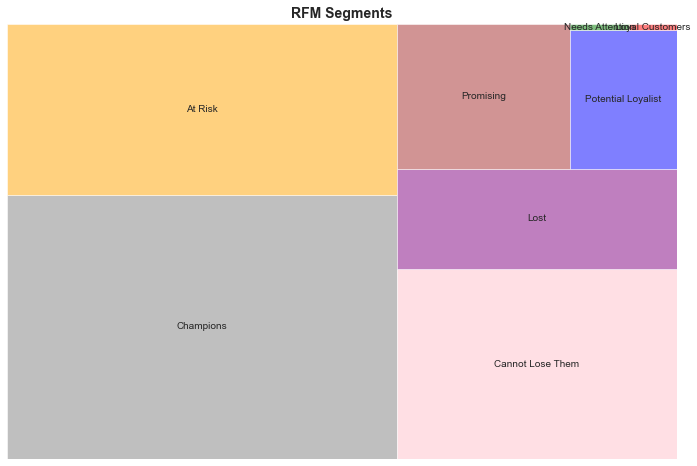

In [116]:
squarity = rfm_df["Label"].value_counts()

# size = (1535, 991, 792, 417, 372, 222, 5, 4)

color = ['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red']
# customer_labels = ["Loyal Customers", "Needs Attention", "Potential Loyalist", "Promising", "Lost", "Cannot Lose Them", "At Risk", "Champions"]
customer_labels = squarity.index.tolist()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes = squarity \
              , label = customer_labels \
              , color = color \
              , alpha = 0.5)

plt.title("RFM Segments", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

In [117]:
squarity

Champions             1535
At Risk                991
Cannot Lose Them       792
Lost                   417
Promising              372
Potential Loyalist     222
Needs Attention          5
Loyal Customers          4
Name: Label, dtype: int64

#### 4.3.3 Personas - Clustering

In [119]:
X = rfm_df[["Recency", "Frequency", "Monetary"]]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[:5]

array([[ 2.32938811, -0.48151848,  8.35866818],
       [-0.90058811,  0.52717069,  0.25096626],
       [-0.17059349,  0.02282611, -0.02859601],
       [-0.74058929, -0.48151848, -0.0330118 ],
       [ 2.17938921, -0.48151848, -0.19134727]])

In [120]:
inertias = {}
cluster_labels = {}

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=777).fit(X_std)
    inertias[i] = kmeans.inertia_
    

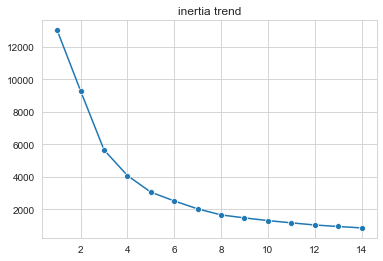

In [121]:
sns.set_style("whitegrid")
ax = sns.lineplot(x=list(inertias.keys()), y=list(inertias.values()), marker='o')

plt.title("inertia trend", fontsize=12)

plt.show()

n_clusters: 2 The average silhouette score is: 0.8934822760446659


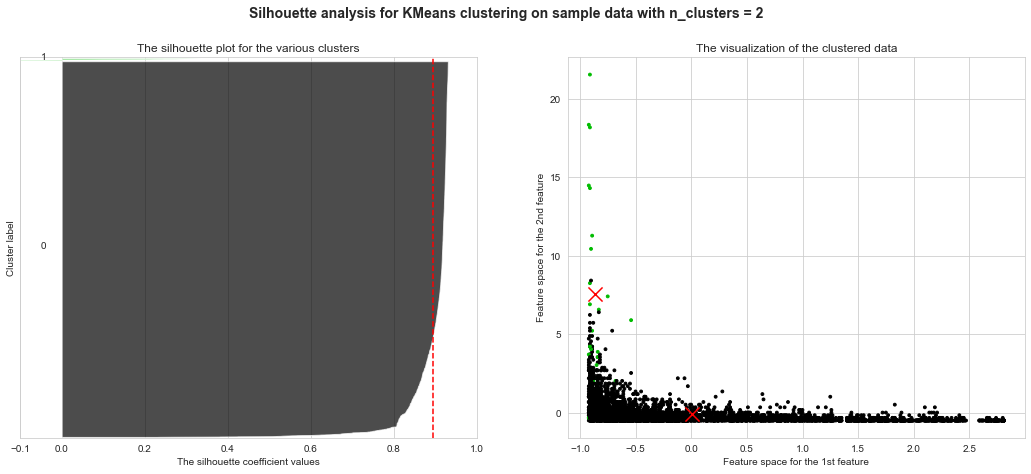

n_clusters: 3 The average silhouette score is: 0.5730931307842481


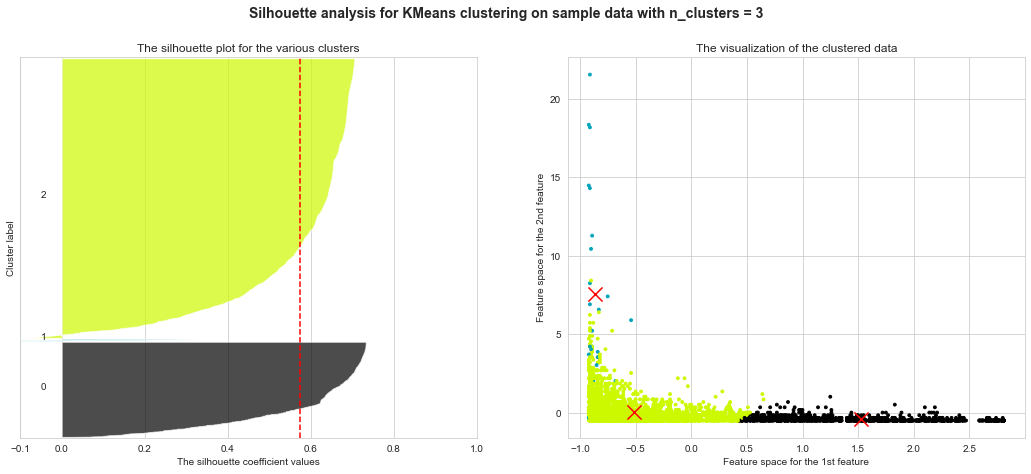

n_clusters: 4 The average silhouette score is: 0.6004606743642564


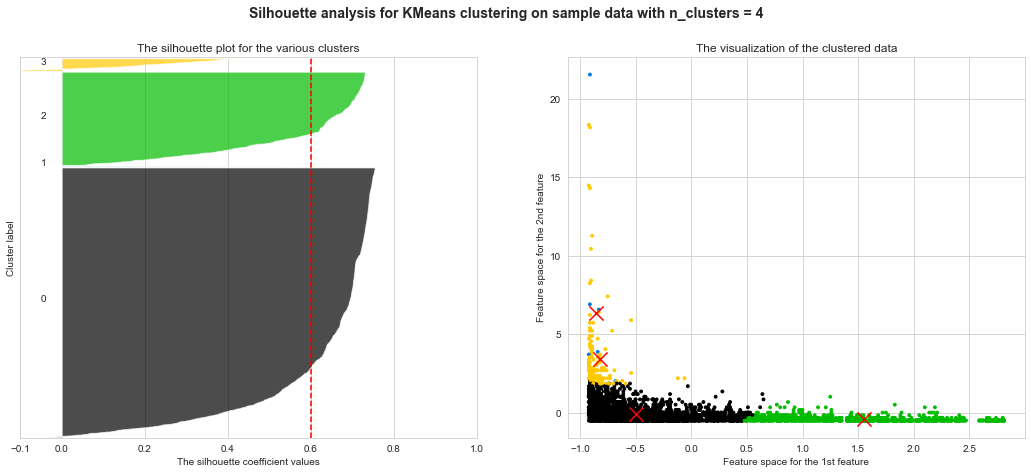

n_clusters: 5 The average silhouette score is: 0.6015175879402553


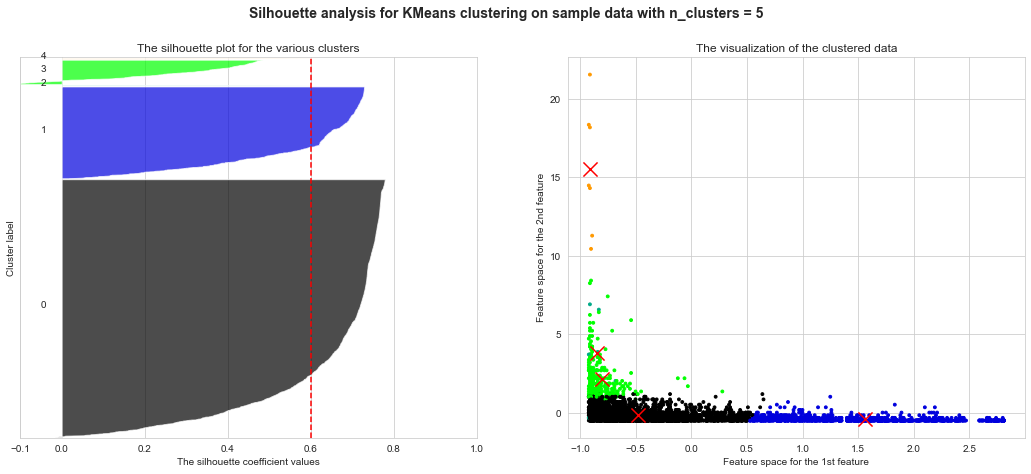

n_clusters: 6 The average silhouette score is: 0.5918939685590836


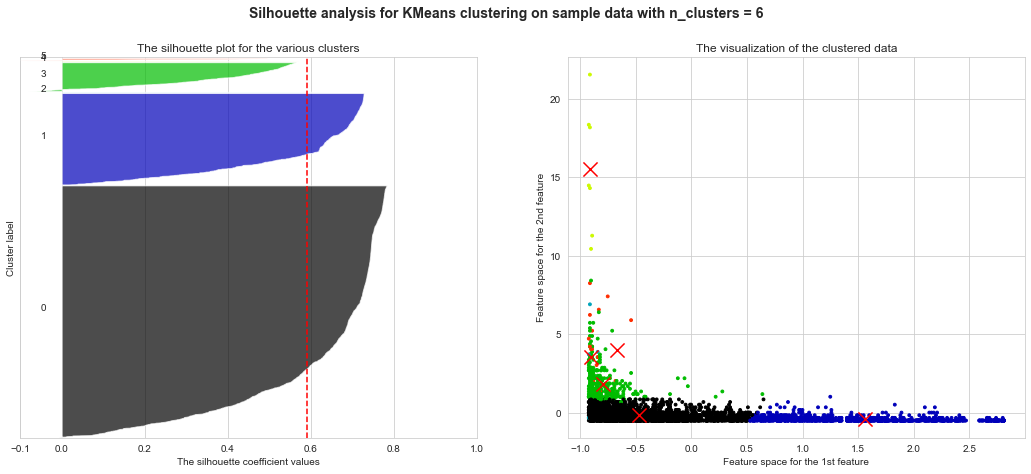

n_clusters: 7 The average silhouette score is: 0.5035068512245132


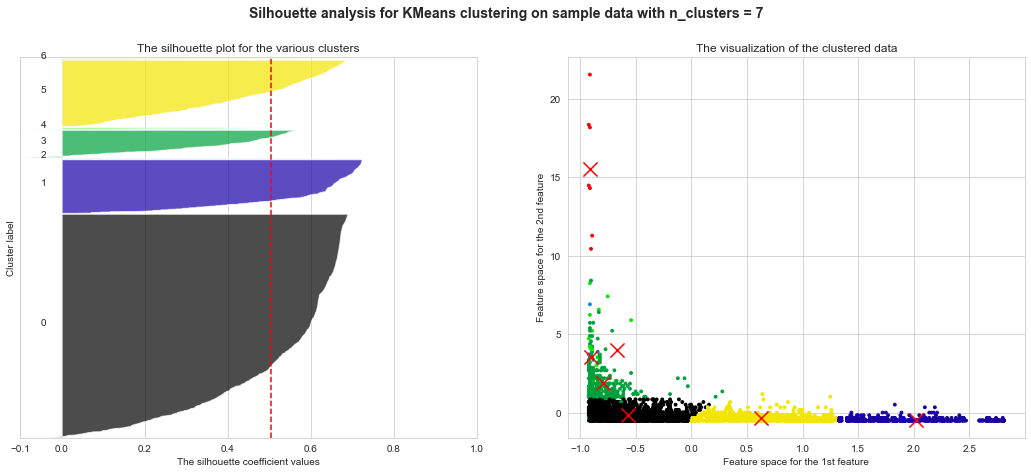

In [122]:
clusterers = {}

for n_clusters in range(2, 8):
    # step1. set n_clusters 
#     n_clusters = 4
#     n_clusters = n_clusters


    # step2. Modeling
    clusterer = KMeans(n_clusters = n_clusters, random_state=10).fit(X_std)
    clusterers[n_clusters] = clusterer
    
    cluster_labels = clusterer.labels_

    # step3. get silhouette score for each sample, these formed the x-axis.
    silhouette_samples_values = silhouette_samples(X_std, cluster_labels)

    silhouette = silhouette_score(X_std, cluster_labels)
    print("n_clusters:", n_clusters, "The average silhouette score is:", silhouette)
    
    # step1. create a figure, one row two columns
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # step2. set the size of above figure
    fig.set_size_inches(18, 7)

    """
    Figure1: silhouette plot which consists of series of bar belong to the same cluster.
    x-axis: values of silhouette score
    y-axis: clusters of samples.
    """

    # step3. set x-axis
    # since we just care about those values greater than 0, hence, setting interval [-0.1, 1]
    ax1.set_xlim([-0.1, 0.5])

    # step4. set y-axis
    # start from 0, and end with X.shape[0]
    # however, we want to see
    # 1. the samples go together if they belong to the same cluster.
    # 2. keep a litter bit distance between different clusters to understand the info earlier.
    # Thus, it is better to add an interval (n_clusters + 1)*10 between clusters
    ax1.set_ylim([0, X.shape[0] + (n_clusters+1) * 10])


    # Set init_y, which indicate the start y-axis for each cluster
    y_lower = 10

    # Loop clusters
    for i in range(n_clusters):
        # step1. get silhouette score within a cluster.
        silhouette_values_i = silhouette_samples_values[cluster_labels == i]

        # step2. sort silhouette score within a cluster.
        ## tips! Do not change the ordered in silhouette_samples_values array.
        silhouette_values_i = np.sort(silhouette_values_i)

        # step3. get the number of samples in a cluster.
        size_cluster_i = silhouette_values_i.shape[0]

        # step4. indicate the upper value of the y-axis.
        y_upper = y_lower + size_cluster_i

        # step5. set colormap. function: nipy_spectral([decimal])
        color = cm.nipy_spectral(float(i)/n_clusters)

        # step6. plot figure1

        ## fill_between/fill_betweenx/fill_betweeny: the same color within the given range.
        ## Here, using fill_betweenx
        ## (the lower limit of y-axis, the upper limit of y-axis, x-axis, color of bars)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,silhouette_values_i
                         ,facecolor=color
                         ,alpha=0.7)


        # step7. give numbers to clusters - centered position
        ax1.text(-0.05
                ,y_lower + 0.5*size_cluster_i
                ,str(i))

        # step8. refresh y_lower
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Plot the mean with a dotted line on the graph.
    ax1.axvline(x = silhouette, color="red", linestyle="--")

    # Reset xticks.
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Remove yticks.
    ax1.set_yticks([])

    """Subplot 2"""
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(X_std[:, 0], X_std[:, 1], marker='o', s=8, c=colors)

    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', alpha=1, s=200)

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")


    # Set the super title.
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters), 
                fontsize=14, fontweight='bold')
    plt.show()

#### Personas

In [123]:
cluster_center_2 = clusterers[2].cluster_centers_
cluster_center_2.shape

(2, 3)

In [124]:
cluster_center_2 = scaler.inverse_transform(cluster_center_2)
cluster_center_2

array([[1.14539638e+02, 3.61381548e+00, 1.56308354e+03],
       [2.77500000e+01, 4.88750000e+01, 9.03443958e+04]])

In [125]:
clusterers[2].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [126]:
X["cluster"] = clusterers[2].labels_


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
X["cluster"].value_counts(1)

0    0.994467
1    0.005533
Name: cluster, dtype: float64

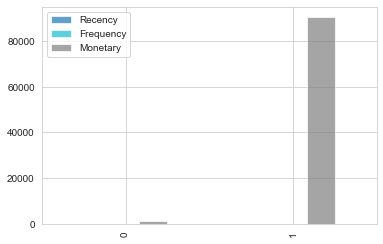

In [128]:
cols = ['Recency','Frequency','Monetary']
result = pd.DataFrame(data=cluster_center_2
                      ,columns=cols).reset_index(drop= True)
# ['C0', 'C9', 'C7', 'C6', 'C8']
result.plot(kind='bar',color=['C0', 'C9', 'C7'],clip_on=False,alpha = 0.7)
plt.show()

In [129]:
## 5

cluster_center_5 = clusterers[5].cluster_centers_
cluster_center_5.shape

(5, 3)

In [130]:
cluster_center_5 = scaler.inverse_transform(cluster_center_5)
cluster_center_5

array([[6.63438549e+01, 3.22766958e+00, 1.26932704e+03],
       [2.70413371e+02, 1.46892655e+00, 5.65210622e+02],
       [2.90000000e+01, 2.65000000e+01, 1.90863462e+05],
       [3.40456140e+01, 1.66982456e+01, 1.06120733e+04],
       [2.31428571e+01, 9.61428571e+01, 5.16395214e+04]])

In [131]:
X["cluster"] = clusterers[5].labels_


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
X["cluster"].value_counts(1)

0    0.686953
1    0.244813
3    0.065237
4    0.001614
2    0.001383
Name: cluster, dtype: float64

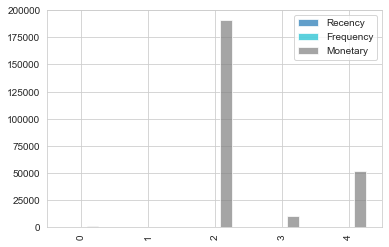

In [133]:
cols = ['Recency','Frequency','Monetary']
result = pd.DataFrame(data=cluster_center_5
                      ,columns=cols).reset_index(drop= True)
# ['C0', 'C9', 'C7', 'C6', 'C8']
result.plot(kind='bar',color=['C0', 'C9', 'C7'],clip_on=False,alpha = 0.7)
plt.show()

#### 4.3.4 Summary

From above modules analysis, we can gain some knowledge about customers:

***Customers in Different Countries***
* Since the volumns of United Kingdom occupies more than 80%, I removed it to check the components clearly. Unexpectedly, the trends of per customer transation is not the same with the distribution of number of orders in those countries, we may need to do further analysis on price preference on customers by country.

***Customer Segmentation -- RFM***
* Luckily, the percentage of champions is the highest. However, the company must take some action to recall the customers on those 'cannot lose them' and 'at risk', they accounted for almost half of proportion.

***Personas -- Clustering***
* The silhouette score is relativly high when dividing customers into 2 groups or 5 groups, thus companies can make different decisions based on resources allocation.


**Conclusion**
* Adjust strategies on customer relationship management to increase retention and engagement.
